In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

In [4]:
df =  pd.read_csv('raw_data.csv')
df.columns =["start", "total", 'overhead', 'duration']
df.head()

,start,total,overhead,duration
0,0,200,1.206123,88
1,0,200,1.883375,439
2,0,200,1.480150,481
3,0,200,1.243782,132
4,0,200,1.596180,337


In [10]:
df['total'].unique()

array([200, 300, 400, 500, 600])

In [7]:
df.shape

(10604, 4)

## Trying to get the inxeds on which there is a value change for the 'total car number in the simulation' column 

In [15]:
df['c'] = df['total'].diff()
df_filtered = df[df['c'] != 0]
df_filtered

,start,total,overhead,duration,c
0,0,200,1.206123,88,NaN
404,0,300,2.924999,299,100.0
993,0,200,1.346061,157,-100.0
1622,0,300,1.302700,197,100.0
2537,0,200,3.030498,467,-100.0
3145,0,300,1.582606,264,100.0
3752,0,400,3.204107,205,100.0
4740,0,300,1.116196,54,-100.0
5355,0,200,1.768627,272,-100.0
5974,0,300,1.941070,427,100.0


In [19]:
index_list = df_filtered.index.tolist()
print(len(index_list))
print(index_list)

17
[0, 404, 993, 1622, 2537, 3145, 3752, 4740, 5355, 5974, 6567, 7191, 8124, 8989, 9531, 10037, 10553]


In [21]:
l_mod = index_list + [max(index_list)+1] # creating a list of indexes to iterate over (must have 0 in it)
list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)] # creating a list of dfs for each index

In [28]:
list_of_dfs[2]

,start,total,overhead,duration,c
993,0,200,1.346061,157,-100.0
994,0,200,1.809725,36,0.0
995,0,200,1.447923,347,0.0
996,0,200,1.172404,67,0.0
997,0,200,1.574290,511,0.0
...,...,...,...,...,...
1617,0,200,2.353597,558,0.0
1618,0,200,1.219494,270,0.0
1619,0,200,1.750943,355,0.0
1620,0,200,1.293909,217,0.0


In [58]:
# creating data groups for plotting
df2, df3, df4,df5,df6 = [], [], [], [],[]
for i in[0, 2, 4, 8, 10]:
    x = list_of_dfs[i]['overhead'].tolist()
    df2.append(x)
    
for i in [1, 3, 5, 7, 9, 11]:
    x = list_of_dfs[i]['overhead'].tolist()
    df3.append(x)
    
for i in [6, 12, 16]:
    x = list_of_dfs[i]['overhead'].tolist()
    df4.append(x)
    
for i in [13, 15]:
    x = list_of_dfs[i]['overhead'].tolist()
    df5.append(x)
    
df6 = list_of_dfs[14]

In [64]:
# df2 = pd.concat([list_of_dfs[x] for x in [0, 2, 4, 8, 10]])
# df3 = pd.concat([list_of_dfs[x] for x in [1, 3, 5, 7, 9, 11]])
# df4 = pd.concat([list_of_dfs[x] for x in [6, 12, 16]])
# df5 = pd.concat([list_of_dfs[x] for x in [13, 15]])
# df6 = pd.concat([list_of_dfs[x] for x in [14]])

ValueError: List of boxplot statistics and `positions` values must have same the length

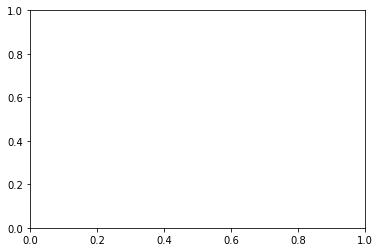

In [67]:
fig = figure()
ax = axes()

bp = boxplot(df2, positions = [1, 2], widths = 0.6)
# setBoxColors(bp)

# second boxplot pair
bp = boxplot(df3, positions = [4, 5], widths = 0.6)
# setBoxColors(bp)

# thrid boxplot pair
bp = boxplot(df4, positions = [7, 8], widths = 0.6)
# setBoxColors(bp)

# set axes limits and labels
xlim(0,9)
ylim(0,9)
ax.set_xticklabels(['200', '300', '400'])
ax.set_xticks([1.5, 4.5, 7.5])

# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1],'b-')
hR, = plot([1,1],'r-')
# legend((hB, hR),('Apples', 'Oranges'))
# hB.set_visible(False)
# hR.set_visible(False)

# savefig('boxcompare.png')
show()
# hold(True)

ValueError: Dimensions of labels and X must be compatible

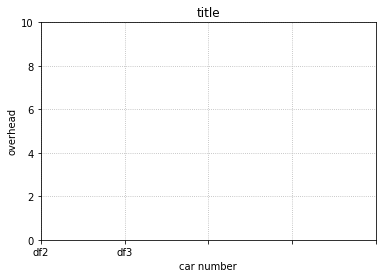

In [69]:
# --- Labels for your data:
labels_list = ['df2','df3']
xlocations  = range(len(df2))
width       = 0.3
symbol      = 'r+'
ymin        = 0
ymax        = 10

ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.set_xticklabels( labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
plt.xlabel('car number')
plt.ylabel('overhead')
plt.title('title')

# --- Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(df2, 
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1, 
#             widths=width, 
#           notch=False,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.boxplot(df3, 
            labels=labels_list,
            sym=symbol,
            positions=positions_group2, 
#             widths=width, 
#           notch=False,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
#           patch_artist=False,
            )

In [ ]:
-